## Import libraries

In [5]:
print("load libraries")
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# https://stackoverflow.com/a/34306306/4126114
np.random.seed(0)

load libraries


## Generate data

X [[ 0.17640523 -0.04837975  3.00395099  2.16057371 -0.10517378  0.07123145]
 [ 0.13984914  0.32847254  3.03383776  1.89052903  0.21265031  0.35249944]
 [ 0.29654313  0.38435079  2.91578168  2.12583722  0.27954611  0.57608924]
 [ 0.51960953  0.57123257  2.99503677  2.14580907  0.68264116  1.20225069]
 [ 0.57617414  0.74538793  2.87697546  1.97077968  0.60628914  1.18246328]
 [ 0.38169775  0.91970676  2.90112073  2.06723926  1.01889409  1.40059184]
 [ 0.65965132  1.06804433  3.06020746  2.09316863  0.98003401  1.63968532]
 [ 0.62908197  1.22078298  2.98404514  2.10442932  0.83640144  1.46548341]
 [ 0.70703421  1.56743515  2.8716652   2.00828541  0.93021428  1.63724849]
 [ 0.82438676  1.52178427  2.87617799  1.94159486  0.87491239  1.69929915]]


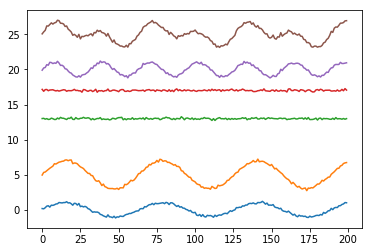

In [6]:
N=100000
X = np.zeros(shape=(N,6))
# X[:,0] = 2*np.ones(shape=(N,))
# X[:,1] = 3*np.ones(shape=(N,))
# X[:,2] = 4*np.ones(shape=(N,))
sigma = 0.1
xt=np.arange(0,N/10,1/10)
X[:,0] = 1*np.sin(1*xt) + np.random.normal(0, sigma, N) # first sine wave
X[:,1] = 2*np.sin(1*xt) + np.random.normal(0, sigma, N) # close duplicate of col above
X[:,2] = np.random.normal(3, sigma, N) # first flat
X[:,3] = np.random.normal(2, sigma, N) # close duplicate of col above
X[:,4] = np.sin(2*xt) + np.random.normal(0, sigma, N) # second sine wave of new frequency

# Case 1: keep col 5 at 0
# Performances in descending order:
# - PCA with dimensionality reduction
# - AE with PCA (after dimensionality reduction)
#    - Note: even just dropping the col5=0 makes a difference
# - AE with PCA without dimensionality reduction
# - AE without PCA
#
# Case 2: make col 5 a combination of 0 and 4
X[:,5] = X[:,0]+X[:,4] # linear combination of sine waves above

print('X',X[0:10,:])

# plot
from matplotlib import pyplot as plt
def myPlot(X):
    X_plt = X+5*np.arange(X.shape[1])
    N_PLOT=200
    plt.plot(X_plt[0:N_PLOT,:])
    plt.show()

myPlot(X)

## Normalize

X normalized [[ 0.57256629  0.48237672  0.50144069  0.68264278  0.45789738  0.51705569]
 [ 0.55996018  0.56194547  0.5381266   0.3728326   0.57438926  0.57939107]
 [ 0.61399499  0.57374362  0.39321318  0.64279116  0.59890853  0.62894365]
 [ 0.69091786  0.61320192  0.49049852  0.66570397  0.74665473  0.76771526]
 [ 0.71042376  0.64997315  0.34557868  0.46490058  0.71866947  0.76332992]
 [ 0.64335996  0.6867789   0.37521691  0.57556434  0.86990132  0.81167216]
 [ 0.73921027  0.71809896  0.57049531  0.60531194  0.85565796  0.86466071]
 [ 0.72866865  0.75034826  0.47700633  0.61823083  0.8030124   0.82605361]
 [ 0.75554993  0.82354054  0.33906036  0.50792923  0.83739756  0.86412065]
 [ 0.79601813  0.81390179  0.34459979  0.43141814  0.81712779  0.87787249]]


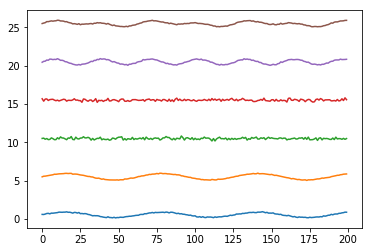

In [7]:
# https://gist.github.com/shadiakiki1986/2c293e364563492c65bffdb6122b4e92
from sklearn.preprocessing import MinMaxScaler #  normalize,
min_max_scaler = MinMaxScaler()
# def myNorm3(X): return normalize(X, norm='l2', axis=0)
def myNorm3(X): return min_max_scaler.fit_transform(X)

X_norm = myNorm3(X)
print("X normalized",X_norm[0:10,:])

# plot
myPlot(X_norm)

## AE without PCA

autoencoder
Train on 80000 samples, validate on 20000 samples
Epoch 1/25
80000/80000 [==============================] - 2s - loss: 0.0470 - val_loss: 0.0438
Epoch 2/25
80000/80000 [==============================] - 2s - loss: 0.0381 - val_loss: 0.0316
Epoch 3/25
80000/80000 [==============================] - 1s - loss: 0.0257 - val_loss: 0.0202
Epoch 4/25
80000/80000 [==============================] - 2s - loss: 0.0155 - val_loss: 0.0117
Epoch 5/25
80000/80000 [==============================] - 1s - loss: 0.0094 - val_loss: 0.0075
Epoch 6/25
80000/80000 [==============================] - 1s - loss: 0.0068 - val_loss: 0.0062
Epoch 7/25
80000/80000 [==============================] - 1s - loss: 0.0059 - val_loss: 0.0055
Epoch 8/25
80000/80000 [==============================] - 1s - loss: 0.0054 - val_loss: 0.0052
Epoch 9/25
80000/80000 [==============================] - 2s - loss: 0.0052 - val_loss: 0.0052
Epoch 10/25
80000/80000 [==============================] - 1s - loss: 0.0051 - val_

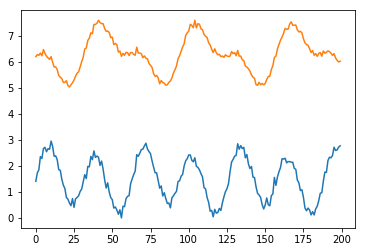

In [18]:
# split
X_train, X_test = train_test_split(X_norm, train_size=0.8, random_state=8888)

# could make wrapper from https://gist.github.com/ktrnka/81c8a7b79cb05c577aab
# and make pipeline
# copied from simple example at https://blog.keras.io/building-autoencoders-in-keras.html
from keras.layers import Input, Dense, Dropout
from keras.models import Model, load_model
from keras.layers.advanced_activations import LeakyReLU #, PReLU

def buildNetwork(input_shape:int):
    input_img = Input(shape=(input_shape,))
    encoded = input_img
    encoding_dim_ae = 2
    # encoded = Dense( encoding_dim_ae, activation='relu' )(encoded)

    # hidden layer
    encoded = Dense( encoding_dim_ae, activation='linear' )(encoded)

    # use leaky relu
    # https://github.com/fchollet/keras/issues/117
    encoded = LeakyReLU(alpha=.3)(encoded)   # add an advanced activation

    # GET DEEP
    # encoding_dim2 = 50
    # encoding_dim3 = 10
    # encoded = Dense(encoding_dim2, activation='relu')(encoded)
    # encoded = Dense(encoding_dim3, activation='relu')(encoded)
    # decoded = Dense(encoding_dim2, activation='relu')(encoded)

    decoded = Dense(input_shape, activation='sigmoid')(encoded)

    autoencoder = Model(input_img, decoded)
    encoder = Model(input_img, encoded)

    # encoded_input = Input(shape=(encoding_dim_ae,))
    # decoder_layer = autoencoder.layers[-1]
    # decoder = Model(encoded_input, decoder_layer(encoded_input))

    # other: optimizer='adadelta', loss='binary_crossentropy'
    autoencoder.compile(optimizer='rmsprop', loss='mean_squared_error')
    encoder.compile(optimizer='rmsprop', loss='mean_squared_error')
    # decoder.compile(optimizer='rmsprop', loss='mean_squared_error')
    
    return (autoencoder, encoder)

# train autoencoder
print("autoencoder")
autoencoder, encoder = buildNetwork(X_norm.shape[1])
N_epochs = 25
autoencoder.fit(
  X_train,
  X_train,
  epochs=N_epochs, #50,
  batch_size=256,
  shuffle=True,
  validation_data=(
    X_test,
    X_test,
  )
)

print("encoder predict")
X_enc = encoder.predict(X_norm)

# plot
myPlot(X_enc)

## PCA without dim reduction

PCA
X_pca_2 [[  5.47051397e-02   5.00509684e-02   2.12290494e-01  -3.41289619e-02
    1.53085033e-01   3.89940398e-13]
 [  4.99429412e-01  -2.13082336e-01  -2.87934167e-02   5.74939551e-02
   -9.94226932e-02   1.04732088e-15]
 [  7.18601789e-01  -3.40965002e-01   1.05576726e-01  -1.11050176e-01
    1.02064392e-01  -2.46855175e-15]
 [  1.29215990e+00  -8.82463030e-01   2.38076139e-01  -4.02315199e-02
    1.36226677e-01  -1.19827897e-15]
 [  1.43283469e+00  -7.44679367e-01   2.01795245e-01  -1.16968579e-01
   -5.95945738e-02   1.60543417e-13]
 [  1.63675341e+00  -1.13982206e+00  -9.33366352e-02  -1.09544007e-01
    4.54765263e-02  -4.78527484e-17]
 [  1.97280442e+00  -1.14597138e+00   1.22284746e-01   3.65677073e-02
    1.01240524e-01  -1.64090904e-16]
 [  1.98167087e+00  -8.94890510e-01   1.08966182e-02  -3.84565371e-02
    9.78440866e-02  -6.73378760e-17]
 [  2.37351969e+00  -9.24320198e-01  -9.34118363e-02  -1.25703484e-01
   -1.84201884e-02  -5.98595562e-17]
 [  2.40875274e+00  -9.14

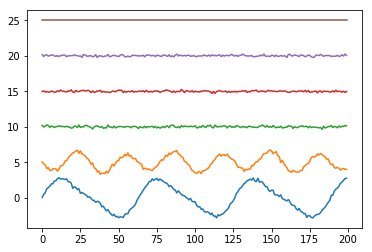

In [13]:
print("PCA")
encoding_dim_pca = X.shape[1] # 'mle'
pca = PCA(n_components=encoding_dim_pca, random_state=888, svd_solver = 'full')
X_pca_2 = pca.fit_transform(X)
print("X_pca_2",X_pca_2[0:10,:])

print("Explained variance ratio (cumsum)", np.cumsum(pca.explained_variance_ratio_))

# plot
myPlot(X_pca_2)

## PCA with dimensionality reduction

PCA MLE
X_pca_1 [[ 0.05470514  0.05005097]
 [ 0.49942941 -0.21308234]
 [ 0.71860179 -0.340965  ]
 [ 1.2921599  -0.88246303]
 [ 1.43283469 -0.74467937]
 [ 1.63675341 -1.13982206]
 [ 1.97280442 -1.14597138]
 [ 1.98167087 -0.89489051]
 [ 2.37351969 -0.9243202 ]
 [ 2.40875274 -0.91485176]]
Explained variance ratio (cumsum) [ 0.77007463  0.99176834]


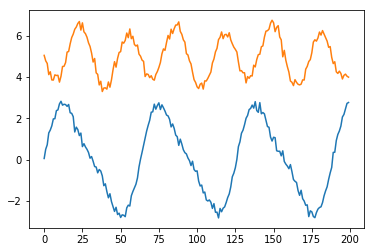

In [14]:
print("PCA MLE")
encoding_dim_pca = 2 # 'mle'
pca = PCA(n_components=encoding_dim_pca, random_state=888, svd_solver = 'full')
X_pca_1 = pca.fit_transform(X)
print("X_pca_1",X_pca_1[0:10,:])

print("Explained variance ratio (cumsum)", np.cumsum(pca.explained_variance_ratio_))

# plot
myPlot(X_pca_1)

## Normalize PCA output

Use the one with dimensionality reduction, otherwise worse results

To test using the one without dimensionality reduction,
replace `X_pca_use = X_pca_1` with `X_pca_use = X_pca_2`

X_pca_use normalized [[ 0.49530552  0.50841232]
 [ 0.5661469   0.44251228]
 [ 0.60105949  0.4104849 ]
 [ 0.69242318  0.27487021]
 [ 0.71483166  0.30937724]
 [ 0.74731445  0.2104163 ]
 [ 0.80084496  0.20887625]
 [ 0.80225732  0.27175783]
 [ 0.86467603  0.26438735]
 [ 0.8702884   0.26675866]]


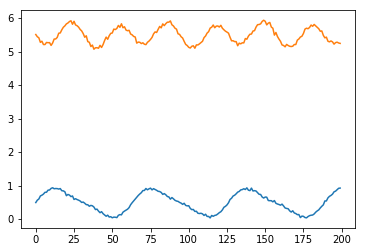

In [15]:
# choose the PCA with the dimensionality reduction
X_pca_use = X_pca_1
X_pca_use = myNorm3(X_pca_use)
print("X_pca_use normalized",X_pca_use[0:10,:])
myPlot(X_pca_use)

## AE with PCA

autoencoder
Train on 80000 samples, validate on 20000 samples
Epoch 1/25
80000/80000 [==============================] - 1s - loss: 0.0610 - val_loss: 0.0526
Epoch 2/25
80000/80000 [==============================] - 1s - loss: 0.0456 - val_loss: 0.0395
Epoch 3/25
80000/80000 [==============================] - 1s - loss: 0.0340 - val_loss: 0.0289
Epoch 4/25
80000/80000 [==============================] - 1s - loss: 0.0234 - val_loss: 0.0177
Epoch 5/25
80000/80000 [==============================] - 1s - loss: 0.0118 - val_loss: 0.0066
Epoch 6/25
80000/80000 [==============================] - 1s - loss: 0.0034 - val_loss: 0.0014
Epoch 7/25
80000/80000 [==============================] - 1s - loss: 8.9279e-04 - val_loss: 5.9280e-04
Epoch 8/25
80000/80000 [==============================] - 1s - loss: 4.5452e-04 - val_loss: 3.7504e-04
Epoch 9/25
80000/80000 [==============================] - 1s - loss: 3.4472e-04 - val_loss: 3.3116e-04
Epoch 10/25
80000/80000 [==============================] - 

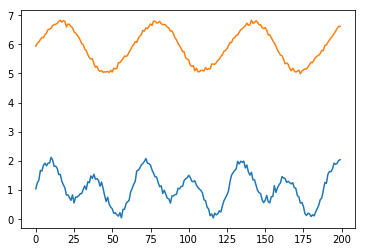

In [16]:
# Use the PCA with dimensionality reduction
# If using the one without dimensionality reduction, result won't be as good
# split
X_train, X_test = train_test_split(X_pca_use, train_size=0.8, random_state=8888)

# train autoencoder
print("autoencoder")
autoencoder, encoder = buildNetwork(X_pca_use.shape[1])
autoencoder.fit(
  X_train,
  X_train,
  epochs=N_epochs, #50,
  batch_size=256,
  shuffle=True,
  validation_data=(
    X_test,
    X_test,
  )
)

print("encoder predict")
X_enc = encoder.predict(X_pca_use)
# print("encoded",X_enc)
# # X_enc_dec = decoder.predict(X_enc)
# # print("enc-dec",X_enc_dec)
# X_rec = autoencoder.predict(X_pca)
# print("recoded",X_rec)

# plot
# from matplotlib import pyplot as plt
myPlot(X_enc)